In [73]:
import sys,os
import datetime
import numpy as np
import pandas as pd
from pathlib import Path

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from wgpack.dservice import readDS_ADCP_C4T


In [74]:
# Get data through dataservice
vnam = 'sv3-1101'
start_date = pd.to_datetime('2022-12-15 19:00:00')
# vnam = 'sv3-125'
# start_date = pd.to_datetime('2022-12-14 00:00:00')

C4T_dic = readDS_ADCP_C4T(vnam, start_date, end_date=datetime.datetime.utcnow())



/var/folders/v3/hjbc_n5s6pxb64gmhz1t6rcc0000gp/T/ipykernel_72617/3724808575.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax[0].pcolormesh(x,y,U_WG,vmin=-uL, vmax=uL,cmap = cm_msk)
/var/folders/v3/hjbc_n5s6pxb64gmhz1t6rcc0000gp/T/ipykernel_72617/3724808575.py:48: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolormesh(x,y,V_WG,vmin=-vL, vmax=vL, cmap = cm_msk)


(19341.791666666668, 19342.72102863719)

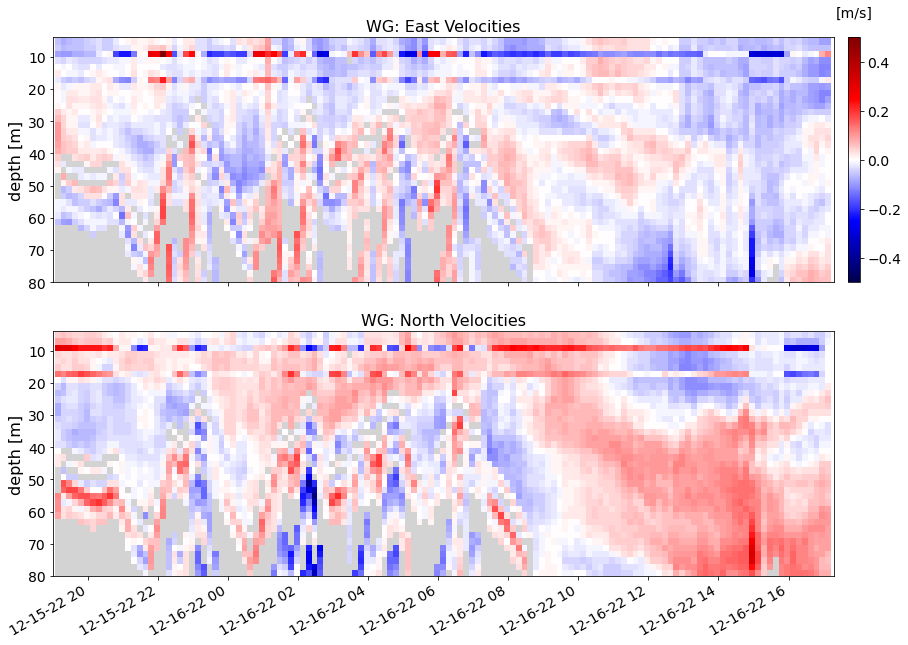

In [75]:
# ----------------------------------------------------------------------------------------------------------------------
# Plot results
# ----------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.gridspec as gridspec
import numpy as np

# create masked colormap
cm_msk = plt.get_cmap('seismic').copy()
cm_msk.set_bad(color='lightgray')

tt_WG = C4T_dic['time']
ranges_WG = C4T_dic['ranges']
# motion-corrected velocities
U_WG = C4T_dic['Evel']
V_WG = C4T_dic['Nvel']

# Plot WG water velocities
yL = [4,80]
uL = 0.5
vL = 0.5
fntsz = 16
labsz = 14
ylab_str = 'depth [m]'

# Do not show vehicle heading
heights = [1,1]
nrows = 2
ncols = 1
gs_kw = dict(height_ratios=heights)
fig, ax = plt.subplots(ncols=ncols, nrows=nrows,
                            sharex=True,
                            sharey=False,
                            gridspec_kw=gs_kw,
                            figsize=(14, 11))

# WG: East Vel
x,y = np.meshgrid(tt_WG,ranges_WG)
c = ax[0].pcolormesh(x,y,U_WG,vmin=-uL, vmax=uL,cmap = cm_msk)
ax[0].set_ylim(yL)
ax[0].set_ylabel(ylab_str,fontsize=fntsz)
ax[0].set_title('WG: East Velocities',fontsize=fntsz)
ax[0].invert_yaxis()

# WG: North Vel
x,y = np.meshgrid(tt_WG,ranges_WG)
ax[1].pcolormesh(x,y,V_WG,vmin=-vL, vmax=vL, cmap = cm_msk)
ax[1].set_ylim(yL)
ax[1].set_ylabel(ylab_str,fontsize=fntsz)
ax[1].set_title('WG: North Velocities',fontsize=fntsz)
ax[1].invert_yaxis()


# rotate and align the tick labels so they look better
ax[0].tick_params(labelsize=labsz)
ax[1].tick_params(labelsize=labsz)

# Define the date format
date_form = DateFormatter("%m-%d-%y %H")
ax[1].xaxis.set_major_formatter(date_form)
fig.autofmt_xdate()


# add a colorobar
gs = gridspec.GridSpec(ncols=3, nrows=nrows, height_ratios=gs_kw['height_ratios'], right=0.95,figure=fig)
axc = fig.add_subplot(gs[0,-1])
axc.set_visible(False)
cbar = fig.colorbar(c, ax=axc,orientation='vertical')
cax = cbar.ax
# Add label on top of colorbar.
cbar.ax.set_xlabel("[m/s]\n",fontsize=labsz)
cbar.ax.xaxis.set_label_position('top')
cbar.ax.tick_params(labelsize=labsz)

# xlimits
ax[1].set_xlim(start_date,datetime.datetime.utcnow())

# save figure
# fig.savefig('/Users/a1amador/Downloads/'+vnam+'_adcp_C4.jpg')


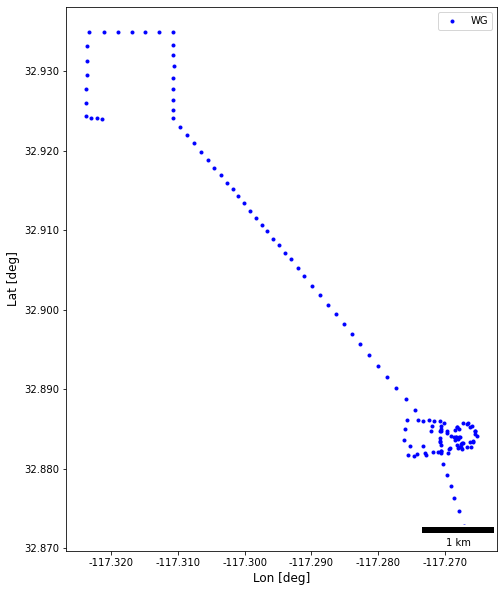

In [76]:
# Plot map
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from matplotlib import rcParams
from matplotlib.ticker import FormatStrFormatter
from matplotlib_scalebar.scalebar import ScaleBar
from geopy.distance import distance


_y = np.nanmedian(C4T_dic['latitude'])

# Define levels in z-axis where we want lines to appear
levels = np.linspace(-275,0,12)


# Initialize plot objects
rcParams['figure.figsize'] = 5, 10 # sets plot size
# set negative contours to be solid instead of dashed:
plt.rcParams['contour.negative_linestyle'] = 'solid'

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.plot(C4T_dic['longitude'],C4T_dic['latitude'],'.b',label='WG')
# ax.plot(simplified[:,0],simplified[:,-1],'or',label='turning')

# set legend
ax.legend()
# set aspect ratio
ax.set_aspect(aspect=1/np.cos(_y*np.pi/180))
# set axis labels
ax.set_xlabel('Lon [deg]', fontsize=12)
ax.set_ylabel('Lat [deg]', fontsize=12)
# # set axis limits
# ax.set_ylim(yL)
# ax.set_xlim(xL);

# Specify format of floats for tick labels
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

# scalebar
dx = distance((_y,ax.get_xlim()[0]),(_y,ax.get_xlim()[0]+1)).m
scalebar = ScaleBar(dx=dx,units='m',location='lower right') 
plt.gca().add_artist(scalebar)

